In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

# 1. Listing Keywords : 

First we made a list of topics we want to tackle in the tweets.

Topics : 
- Intermittent fasting.
- Veganism. 
- Minimalist life. 
- Paleo diet.
- Meditation. 

Then we made a few keywords for the topics listed above in all languages in switzerland to use when extracting our tweets of interest. 

In [2]:
#Keywords for our tweets of interest. 
Intermittent_fasting ={'intermittentfasting','intermittierendefasten','jeuneintermittent','digiunointermittente'}
Veganism={'plantbased','vegan','veganism','vegane','veganisme'}
Minimalism={'minimalistlife','minimalism','minimalist','minimalistischer','minimalista'}
Meditation={'meditation','meditazione'}
Paleo={'regimepaleo','paleo','paleodiet','palaodiat','palao','dietapaleo','ketogenic','ketogenicdiet','ketogenediat','ketogene','dietachetogenica','chetogenica','regimecetogene','cetogene'}

# 2. Loading the Dataset : 

As a first attempt, we took 10 files of the swiss-tweet dataset to take a look at what the files contain and how they are organized. 

Also, we wanted to see how well the tweets extraction with keywords works on a smaller set to avoid running it on the entire dataset and wait for hours to get bad results.

The 10 files used are : harvest3r_twitter_data_01-01_0.json, harvest3r_twitter_data_01-02_0.json, harvest3r_twitter_data_01-03_0.json, harvest3r_twitter_data_01-04_0.json, harvest3r_twitter_data_01-05_0.json, harvest3r_twitter_data_01-06_0.json, harvest3r_twitter_data_01-07_0.json, harvest3r_twitter_data_01-08_0.json, harvest3r_twitter_data_01-09_0.json, harvest3r_twitter_data_01-10_0.json

In [3]:
#This function iterates over all files in the dataset folder and puts them in the pandas dataframe that we will call tweets.
def load_tweets(path):
    tweets=pd.DataFrame([])
    directory = os.fsencode(path)
    for file in tqdm(os.listdir(directory)):
        filename = os.fsdecode(file)
        new_tweet=pd.read_json(path+filename)
        
        tweets=tweets.append(new_tweet,ignore_index=True)
    tweets=tweets.reset_index(drop=True)
    return tweets

In [6]:
#Loading tweets contained in the folder swiss-tweet in the Datasets folder.
tweets=load_tweets('./Datasets/swiss-tweet/')

100%|██████████| 10/10 [06:40<00:00, 40.07s/it]


# 3. Extracting target tweets : 

The function below was written to delete all spaces and to turn all letters to lower case and replace all letters such as é with e and ä with a and so on. 

The goal of using this function is to increase matching with keywords chances and also to make the keyword lists shorter and not have to exhaustively list all possible combinations of target keywords in the list above.


In [7]:
#This function preprocesses the tweets (read the text above for more details)
def replace_characters(text) : 
    text=text.lower()
    text=text.replace(' ','')
    text=text.replace('é','e')
    text=text.replace('è','e')
    text=text.replace('ê','e')
    text=text.replace('ë','e')
    text=text.replace('ä','a')
    text=text.replace('û','u')
    text=text.replace('ü','u')
    
    return text

In [8]:
#This function looks for the tweets that contain the keywords passed as parameter and returns their indices. 
def extract_target_tweets(tweets,keywords):
    #Initializing the indices array.
    target_indices=[]
    
    #Iterate over all tweets
    for i in tqdm(range(len(tweets['_source']))) : 
        
        #Preprocess the tweets text.
        tweet=replace_characters(tweets['_source'][i]['main'])
        
        for j in keywords : 
            #If tweet contains a keyword save its index in target_indices list.
            if(j in tweet) : target_indices.append(i)
    return target_indices

Below, we look for indices of tweets that contain keywords of topics listed in Listing Keywords section using the two functions defined above.

In [9]:
#Running the function extract_target_tweets on each topic.

intermittent_fasting_tweets=extract_target_tweets(tweets,Intermittent_fasting)
veganism_tweets=extract_target_tweets(tweets,Veganism)
minimalism_tweets=extract_target_tweets(tweets,Minimalism)
meditation_tweets=extract_target_tweets(tweets,Meditation)
paleo_tweets=extract_target_tweets(tweets,Paleo)

100%|██████████| 329681/329681 [00:23<00:00, 14209.31it/s]


In [10]:
#Keeping a list of all indices for later use.
tweets_of_interest_indices=np.unique(intermittent_fasting_tweets+veganism_tweets+minimalism_tweets+meditation_tweets+paleo_tweets)

## Results : 

In [11]:
'Number of tweets about Intermittent fasting : ' +str(len(intermittent_fasting_tweets)),'Number of tweets about veganism : '+str(len(veganism_tweets)),'Number of tweets about Minimalism :' + str(len(minimalism_tweets)),'Number of tweets about Meditation: ' +str(len(meditation_tweets)),'Number of tweets about paleo diet : '+ str(len(paleo_tweets))

('Number of tweets about Intermittent fasting : 0',
 'Number of tweets about veganism : 252',
 'Number of tweets about Minimalism :24',
 'Number of tweets about Meditation: 216',
 'Number of tweets about paleo diet : 40')

The topics that got the most results are veganism and meditation. Intermittent fasting had no results whatsoever with the keywords provided. Minimalism and the paleo diet got very little results. 

# 4. Exploring resulting tweets : 

To explore the resulting extracted tweets, we get the indices from the lists constructed above (intermittent_fasting_tweets, veganism_tweets, minimalism_tweets, meditation_tweets, paleo_tweets) and explore its content. 

## 4.1 Results for Paleo Diet : 

After looking at some of the Paleo diet resulting tweets, we see that most of them were not tweets about the paleo diet at all. 

We see that most of them talk about the paleo festival, exactly like the example tweet shown below.

In [12]:
tweets['_source'][208582]['main']

'@louiseattaqueofficiel at @paleofestival http://www.sigfredoharo.com/paleo-16\xa0 © Sigfredo Haro photography pour le... http://fb.me/6bvdTws5u\xa0'

### Next step : 

The bad results actually look like they were caused by bad choice of keywords. So we may try to fix the keywords for the paleo diet or better yet use another more sophisticated technique (Latent Dirichlet Allocation).

If the results are still small, we might drop this topic. 

## 4.2 Results for Veganism : 

The results for veganism are good, in terms of number and accuracy. But it won't hurt to use a more sophisticated tool to extract tweets even more accurately.

In [13]:
#Example of tweet about veganism and its corresponding sentiment as provided in the dataset.

tweets['_source'][327460]['main'] , tweets['_source'][327460]['sentiment']

('The #simplelife . Freshly made #coffeemorning & Spanish #oliveoil #toast #vegan #simplicity #mylifestyle #MomentOfTruth #awe #love #life',
 'POSITIVE')

## 4.3 Results for meditation : 

It is not surprising that we found many results about meditation, as it is already popular in the western world and more specifically in Switzerland. 

However, some results we got are ads for guided meditation sessions.

In [14]:
#Example of tweet about meditation.
tweets['_source'][294749]['main']

'This school replaced detention with meditation. The results are stunning.'

### Next step :

Filter out all the tweets that contain ads about meditation.

## 4.4 Results for Minimalism : 

The resulting tweets for minimalism are completely off. We may get rid of the topic altogether, but we will give it another try with a new technique for extracting tweets about minimalism before deciding that.

In [15]:
#Example of bad result of tweet about minimalism.
tweets['_source'][242242]['main']

'Minimalist Porcelain Clocks Like a Scale http://v.virg0.org/2bLigJl\xa0 #design'

## 4.5 Results for Intermittent Fasting : 

The intermittent fasting trend is almost inexistant in the tweets we selected. So, we will probably get rid of it for the rest of the project.

# 5. Sentiment Graphs : 

Fortunately, most of the sentiments were provided with the dataset. So, in this section we will have a look at how they were distributed.

In [16]:
#This function returns a list of sentiments at indices provided as a parameter.
def get_list_of_sentiments(indices): 
    sentiments=[]
    for i in indices : 
        try: 
            sentiment=tweets['_source'][i]['sentiment']
            sentiments.append(sentiment)
        #In case there isn't a sentiment field just ignore and keep going.
        except KeyError : continue
    return sentiments

In [20]:
#This function draw a pie plot of the ratio of the number of occurences of the elements in sentiments passed as parameter.
def plot_sentiments(sentiments,title) : 
    labels=np.unique(sentiments)
    values=[sentiments.count(i) for i in labels]
    plt.title(title)
    plt.pie(values,labels=labels,shadow=True)
    plt.show()

Below, we will see the sentiments about the trends that had good results (veganism and meditation) as they were provided in the dataset sample.

## 5.1 Pie plot of veganism sentiments : 

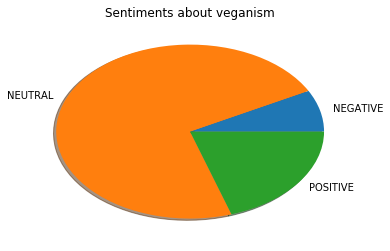

In [21]:
#Getting a list of sentiments of veganism 
veganism_sentiments=get_list_of_sentiments(veganism_tweets)

#Drawing a pie plot of the sentiments.
plot_sentiments(veganism_sentiments,'Sentiments about veganism')


## 5.2 Pie plot of meditation sentiments : 

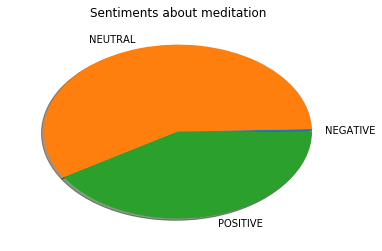

In [22]:
#Getting a list of sentiments of meditation. 
meditation_sentiments=get_list_of_sentiments(meditation_tweets)

#Drawing a pie plot of the sentiments.
plot_sentiments(meditation_sentiments,'Sentiments about meditation')

## 5.3 Discussion :

From the two pie plots, we notice that most of the sentiments are neutral. By exploring the dataset a little we can see that many tweets that should have been positive or negative are labeled as neutral. 

Which is why we will try to determine sentiments of tweets on our own for the next milestone and see if we get better results.

# 6. What comes next : 

1. Find a better way to extract tweets about each topic instead of the tentative approach done above. <br>
2. Run it on all the tweets in the dataset. <br>
3. Show graphs about the sentiments of each topic.<br>
 - 3.1. Go more in details in graphs of sentiments (sentiment per gender ,per time period ,per region of Switzerland and so on...)<br>
 - 3.2. Compare between graphs of topics.
 
4. We might add new topics for more results about trending lifestyles in Switzerland (e.g Gluten free)
5. Present all results with conclusions about what trends seem to get the most love.
6. The report will contain all the steps taken up to milestone 3 to get our results, as well as a discussion of the rsults.
7. The presentation will contain a short description of steps taken to get our results, as well as a presentation of the results with graphs. And finally, draw some conclusions.<br>

(Optional) : We would also like to see what kind of results we get from the bigger twitter dataset.